<a href="https://colab.research.google.com/github/mimomaina/Credit_to_GDP_Gap/blob/main/Credit_to_GDP_Gap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing packages**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import geopandas as gpd
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster

# **Loading in dataset**

In [2]:
df = pd.read_csv('/content/WS_CREDIT_GAP_csv_col.csv')

In [3]:
#make copies of the data set
df_copy = df.copy()
df_copy02 = df.copy()
df_copy03 = df.copy()


# **Exploring and cleaning the data**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132 entries, 0 to 131
Columns: 320 entries, FREQ to 2024-Q1
dtypes: float64(309), object(11)
memory usage: 330.1+ KB


In [5]:
# Inspect the first few rows of the dataset
print(df.head())
print(df.columns)  # Check all the column names


  FREQ  Frequency BORROWERS_CTY Borrowers' country TC_BORROWERS  \
0    Q  Quarterly            BE            Belgium            P   
1    Q  Quarterly            NZ        New Zealand            P   
2    Q  Quarterly            PL             Poland            P   
3    Q  Quarterly            BR             Brazil            P   
4    Q  Quarterly            BR             Brazil            P   

               Borrowing sector TC_LENDERS Lending sector CG_DTYPE  \
0  Private non-financial sector          A    All sectors        A   
1  Private non-financial sector          A    All sectors        A   
2  Private non-financial sector          A    All sectors        C   
3  Private non-financial sector          A    All sectors        C   
4  Private non-financial sector          A    All sectors        B   

                 Credit gap data type  ...  2021-Q4  2022-Q1  2022-Q2 2022-Q3  \
0  Credit-to-GDP ratios (actual data)  ...    206.0    203.9    202.5   202.3   
1  Credit-to-G

In [6]:
# Clean column names to remove any leading/trailing spaces
df.columns = df.columns.str.strip()


In [7]:
# Categorical columns (metadata that should stay fixed)
categorical_columns = ['BORROWERS_CTY', 'Borrowers\' country', 'TC_BORROWERS',
                       'Borrowing sector', 'TC_LENDERS', 'Lending sector',
                       'CG_DTYPE', 'Credit gap data type']

# Year-Quarter columns
year_quarter_columns = [col for col in df.columns if 'Q' in str(col)]


In [8]:
print(year_quarter_columns)


['FREQ', '1947-Q4', '1948-Q1', '1948-Q2', '1948-Q3', '1948-Q4', '1949-Q1', '1949-Q2', '1949-Q3', '1949-Q4', '1950-Q1', '1950-Q2', '1950-Q3', '1950-Q4', '1951-Q1', '1951-Q2', '1951-Q3', '1951-Q4', '1952-Q1', '1952-Q2', '1952-Q3', '1952-Q4', '1953-Q1', '1953-Q2', '1953-Q3', '1953-Q4', '1954-Q1', '1954-Q2', '1954-Q3', '1954-Q4', '1955-Q1', '1955-Q2', '1955-Q3', '1955-Q4', '1956-Q1', '1956-Q2', '1956-Q3', '1956-Q4', '1957-Q1', '1957-Q2', '1957-Q3', '1957-Q4', '1958-Q1', '1958-Q2', '1958-Q3', '1958-Q4', '1959-Q1', '1959-Q2', '1959-Q3', '1959-Q4', '1960-Q1', '1960-Q2', '1960-Q3', '1960-Q4', '1961-Q1', '1961-Q2', '1961-Q3', '1961-Q4', '1962-Q1', '1962-Q2', '1962-Q3', '1962-Q4', '1963-Q1', '1963-Q2', '1963-Q3', '1963-Q4', '1964-Q1', '1964-Q2', '1964-Q3', '1964-Q4', '1965-Q1', '1965-Q2', '1965-Q3', '1965-Q4', '1966-Q1', '1966-Q2', '1966-Q3', '1966-Q4', '1967-Q1', '1967-Q2', '1967-Q3', '1967-Q4', '1968-Q1', '1968-Q2', '1968-Q3', '1968-Q4', '1969-Q1', '1969-Q2', '1969-Q3', '1969-Q4', '1970-Q1', '

In [9]:
# Filter columns to get only the ones with year-quarters
year_quarter_columns = [col for col in df.columns if 'Q' in str(col) and col != 'FREQ']

print(year_quarter_columns)


['1947-Q4', '1948-Q1', '1948-Q2', '1948-Q3', '1948-Q4', '1949-Q1', '1949-Q2', '1949-Q3', '1949-Q4', '1950-Q1', '1950-Q2', '1950-Q3', '1950-Q4', '1951-Q1', '1951-Q2', '1951-Q3', '1951-Q4', '1952-Q1', '1952-Q2', '1952-Q3', '1952-Q4', '1953-Q1', '1953-Q2', '1953-Q3', '1953-Q4', '1954-Q1', '1954-Q2', '1954-Q3', '1954-Q4', '1955-Q1', '1955-Q2', '1955-Q3', '1955-Q4', '1956-Q1', '1956-Q2', '1956-Q3', '1956-Q4', '1957-Q1', '1957-Q2', '1957-Q3', '1957-Q4', '1958-Q1', '1958-Q2', '1958-Q3', '1958-Q4', '1959-Q1', '1959-Q2', '1959-Q3', '1959-Q4', '1960-Q1', '1960-Q2', '1960-Q3', '1960-Q4', '1961-Q1', '1961-Q2', '1961-Q3', '1961-Q4', '1962-Q1', '1962-Q2', '1962-Q3', '1962-Q4', '1963-Q1', '1963-Q2', '1963-Q3', '1963-Q4', '1964-Q1', '1964-Q2', '1964-Q3', '1964-Q4', '1965-Q1', '1965-Q2', '1965-Q3', '1965-Q4', '1966-Q1', '1966-Q2', '1966-Q3', '1966-Q4', '1967-Q1', '1967-Q2', '1967-Q3', '1967-Q4', '1968-Q1', '1968-Q2', '1968-Q3', '1968-Q4', '1969-Q1', '1969-Q2', '1969-Q3', '1969-Q4', '1970-Q1', '1970-Q2'

In [10]:
# Melt the DataFrame into long format
df_long = pd.melt(df, id_vars=categorical_columns, value_vars=year_quarter_columns,
                  var_name='Year_Quarter', value_name='Credit_to_GDP_Gap')

# Check the reshaped data
print(df_long.head())


  BORROWERS_CTY Borrowers' country TC_BORROWERS              Borrowing sector  \
0            BE            Belgium            P  Private non-financial sector   
1            NZ        New Zealand            P  Private non-financial sector   
2            PL             Poland            P  Private non-financial sector   
3            BR             Brazil            P  Private non-financial sector   
4            BR             Brazil            P  Private non-financial sector   

  TC_LENDERS Lending sector CG_DTYPE                Credit gap data type  \
0          A    All sectors        A  Credit-to-GDP ratios (actual data)   
1          A    All sectors        A  Credit-to-GDP ratios (actual data)   
2          A    All sectors        C   Credit-to-GDP gaps (actual-trend)   
3          A    All sectors        C   Credit-to-GDP gaps (actual-trend)   
4          A    All sectors        B     Credit-to-GDP trend (HP filter)   

  Year_Quarter  Credit_to_GDP_Gap  
0      1947-Q4      

In [11]:
df_long.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40392 entries, 0 to 40391
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   BORROWERS_CTY         40392 non-null  object 
 1   Borrowers' country    40392 non-null  object 
 2   TC_BORROWERS          40392 non-null  object 
 3   Borrowing sector      40392 non-null  object 
 4   TC_LENDERS            40392 non-null  object 
 5   Lending sector        40392 non-null  object 
 6   CG_DTYPE              40392 non-null  object 
 7   Credit gap data type  40392 non-null  object 
 8   Year_Quarter          40392 non-null  object 
 9   Credit_to_GDP_Gap     23564 non-null  float64
dtypes: float64(1), object(9)
memory usage: 3.1+ MB


In [12]:
# Convert Year_Quarter to datetime to filter based on years
df_long['Year'] = df_long['Year_Quarter'].str.split('-').str[0]
df_long['Year'] = pd.to_datetime(df_long['Year'], format='%Y')

# Filter data for pre-2006 and post-2006
df_pre_2006 = df_long[df_long['Year'] < pd.to_datetime('2006')]
df_post_2006 = df_long[df_long['Year'] >= pd.to_datetime('2006')]


In [13]:
df_long.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40392 entries, 0 to 40391
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   BORROWERS_CTY         40392 non-null  object        
 1   Borrowers' country    40392 non-null  object        
 2   TC_BORROWERS          40392 non-null  object        
 3   Borrowing sector      40392 non-null  object        
 4   TC_LENDERS            40392 non-null  object        
 5   Lending sector        40392 non-null  object        
 6   CG_DTYPE              40392 non-null  object        
 7   Credit gap data type  40392 non-null  object        
 8   Year_Quarter          40392 non-null  object        
 9   Credit_to_GDP_Gap     23564 non-null  float64       
 10  Year                  40392 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(9)
memory usage: 3.4+ MB


In [14]:
# Save DataFrame to a CSV file
df_long.to_csv('credit_longformat.csv', index=False)
df_pre_2006.to_csv('pre_2006.csv', index=False)
df_post_2006.to_csv('post_2006.csv', index=False)

In [15]:
df_pre_2006.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30756 entries, 0 to 30755
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   BORROWERS_CTY         30756 non-null  object        
 1   Borrowers' country    30756 non-null  object        
 2   TC_BORROWERS          30756 non-null  object        
 3   Borrowing sector      30756 non-null  object        
 4   TC_LENDERS            30756 non-null  object        
 5   Lending sector        30756 non-null  object        
 6   CG_DTYPE              30756 non-null  object        
 7   Credit gap data type  30756 non-null  object        
 8   Year_Quarter          30756 non-null  object        
 9   Credit_to_GDP_Gap     13958 non-null  float64       
 10  Year                  30756 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(9)
memory usage: 2.8+ MB


In [16]:
# Remove leading/trailing spaces from column names
df_pre_2006.columns = df_pre_2006.columns.str.strip()

# Check again
print(df_pre_2006.columns)


Index(['BORROWERS_CTY', 'Borrowers' country', 'TC_BORROWERS',
       'Borrowing sector', 'TC_LENDERS', 'Lending sector', 'CG_DTYPE',
       'Credit gap data type', 'Year_Quarter', 'Credit_to_GDP_Gap', 'Year'],
      dtype='object')


In [17]:
df_post_2006.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9636 entries, 30756 to 40391
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   BORROWERS_CTY         9636 non-null   object        
 1   Borrowers' country    9636 non-null   object        
 2   TC_BORROWERS          9636 non-null   object        
 3   Borrowing sector      9636 non-null   object        
 4   TC_LENDERS            9636 non-null   object        
 5   Lending sector        9636 non-null   object        
 6   CG_DTYPE              9636 non-null   object        
 7   Credit gap data type  9636 non-null   object        
 8   Year_Quarter          9636 non-null   object        
 9   Credit_to_GDP_Gap     9606 non-null   float64       
 10  Year                  9636 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(9)
memory usage: 903.4+ KB


In [18]:
print(df_post_2006.info())
print(df_post_2006.describe())


<class 'pandas.core.frame.DataFrame'>
Index: 9636 entries, 30756 to 40391
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   BORROWERS_CTY         9636 non-null   object        
 1   Borrowers' country    9636 non-null   object        
 2   TC_BORROWERS          9636 non-null   object        
 3   Borrowing sector      9636 non-null   object        
 4   TC_LENDERS            9636 non-null   object        
 5   Lending sector        9636 non-null   object        
 6   CG_DTYPE              9636 non-null   object        
 7   Credit gap data type  9636 non-null   object        
 8   Year_Quarter          9636 non-null   object        
 9   Credit_to_GDP_Gap     9606 non-null   float64       
 10  Year                  9636 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(9)
memory usage: 903.4+ KB
None
       Credit_to_GDP_Gap                           Year
count

## **Analysis and Visualisation**

# **Problem statement **

The goal of this analysis is to investigate the recovery trends and financial stability of countries with a high GDP(2024) and countries with a high Credit_to_GDP Gap
 by comparing their Credit-to-GDP Gap during and after major global crises.

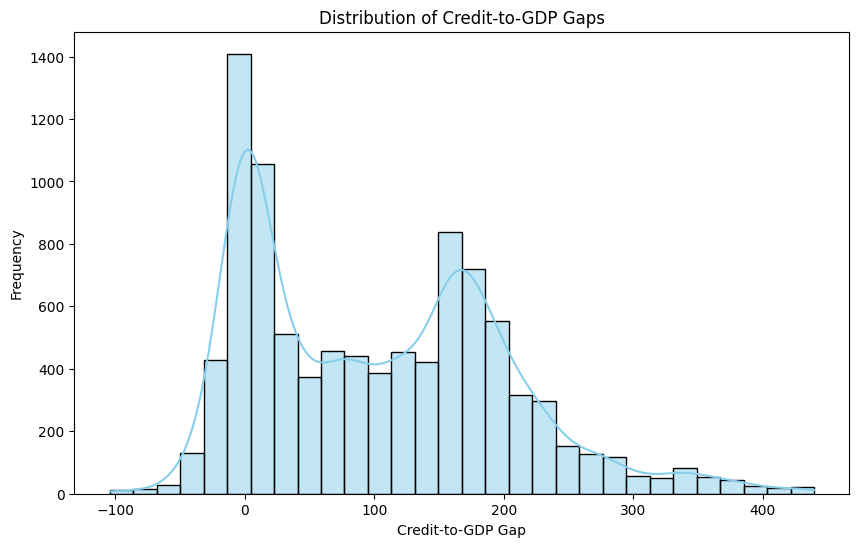

In [19]:
plt.figure(figsize=(10, 6))
sns.histplot(df_post_2006['Credit_to_GDP_Gap'], kde=True, bins=30, color='skyblue')
plt.title("Distribution of Credit-to-GDP Gaps")
plt.xlabel("Credit-to-GDP Gap")
plt.ylabel("Frequency")
plt.show()


In [20]:
# Calculate the mean for each borrower country
country_means = df_post_2006.groupby("Borrowers' country")['Credit_to_GDP_Gap'].mean().reset_index()

# Bar Chart with Plotly
fig2 = px.bar(country_means, x="Credit_to_GDP_Gap", y="Borrowers' country", orientation='h',
              color="Credit_to_GDP_Gap", color_continuous_scale="Reds",
              title="Average Credit-to-GDP Gap by Borrower Country")

fig2.update_layout(
    xaxis_title="Mean Credit-to-GDP Gap",
    yaxis_title="Borrower Country",
    template="plotly_white"
)

fig2.show()


In [21]:
df_post_2006.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9636 entries, 30756 to 40391
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   BORROWERS_CTY         9636 non-null   object        
 1   Borrowers' country    9636 non-null   object        
 2   TC_BORROWERS          9636 non-null   object        
 3   Borrowing sector      9636 non-null   object        
 4   TC_LENDERS            9636 non-null   object        
 5   Lending sector        9636 non-null   object        
 6   CG_DTYPE              9636 non-null   object        
 7   Credit gap data type  9636 non-null   object        
 8   Year_Quarter          9636 non-null   object        
 9   Credit_to_GDP_Gap     9606 non-null   float64       
 10  Year                  9636 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(9)
memory usage: 903.4+ KB


Countries with the highest gdp:
        United States,
        China,
        Japan,
        Germany,
        India
        (Respectively)


<ipython-input-64-9563bf8e9dc9>:12: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




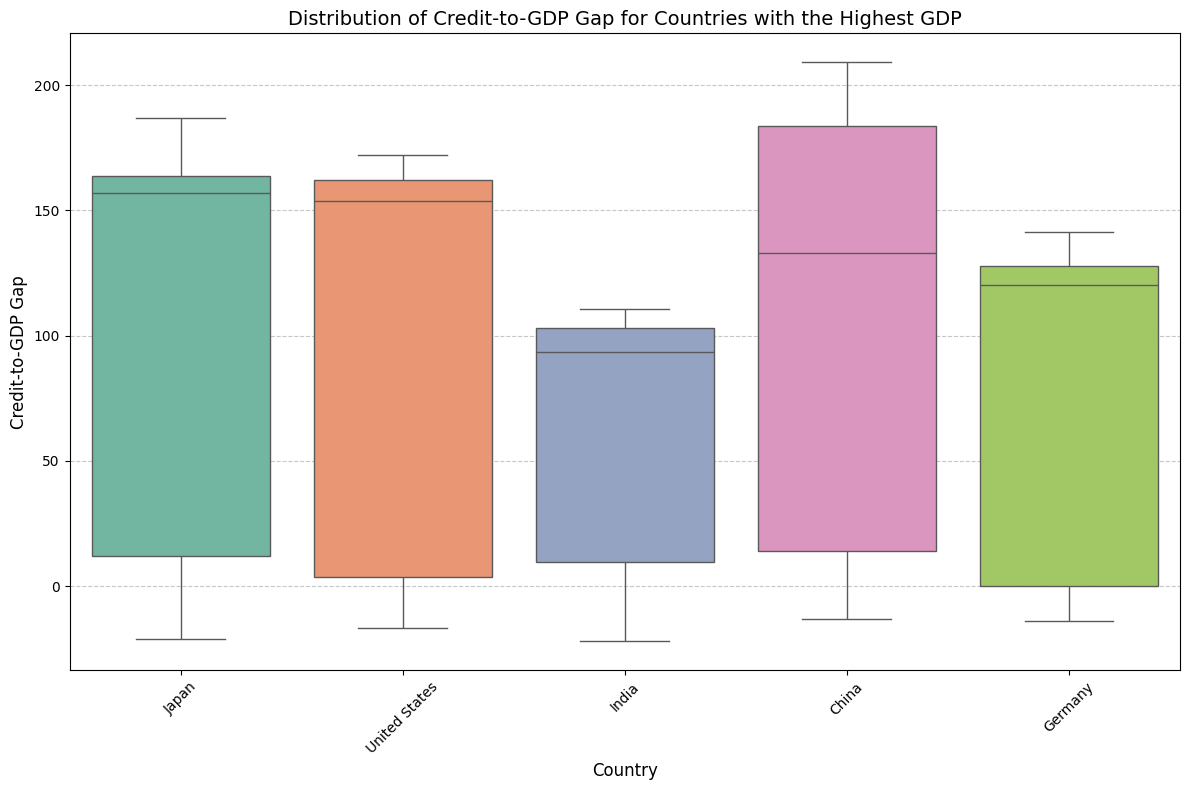

In [64]:
# Ensure 'Year_Quarter' is a datetime object
df_post_2006['Year_Quarter'] = pd.to_datetime(df_post_2006['Year_Quarter'])

# Define the top 5 countries by GDP
top_5_countries_by_gdp = ['United States', 'China', 'Japan', 'Germany', 'India']

# Filter data for the top 5 countries
filtered_data_gdp = df_post_2006[df_post_2006["Borrowers' country"].isin(top_5_countries_by_gdp)]

# Plot the boxplot
plt.figure(figsize=(12, 8))
sns.boxplot(
    x="Borrowers' country",
    y="Credit_to_GDP_Gap",
    data=filtered_data_gdp,
    palette="Set2"
)

# Customize the plot
plt.title('Distribution of Credit-to-GDP Gap for Countries with the Highest GDP', fontsize=14)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Credit-to-GDP Gap', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()


In [63]:
gdp_values = {
    'United States': 21.43,  # in Trillion USD (as an example)
    'China': 14.34,
    'Japan': 5.08,
    'Germany': 3.84,
    'India': 2.87,
    'United Kingdom': 2.63,
    'France': 2.78,
    'Brazil': 2.05,
    'Canada': 1.64,
    'Italy': 1.85
}

# Create a DataFrame with these values
gdp_df = pd.DataFrame(list(gdp_values.items()), columns=['Borrowers\' country', 'GDP'])

# Identify the top 5 countries with the highest GDP
top_5_gdp_countries = gdp_df.nlargest(5, 'GDP')['Borrowers\' country']

# Identify the top 5 countries with the highest Credit-to-GDP Gap
top_5_gap_countries = df_post_2006.groupby("Borrowers' country")['Credit_to_GDP_Gap'].mean().nlargest(5).index

#  Filter the data for the relevant countries

# Filter the data for top 5 countries by GDP
gdp_countries_data = df_post_2006[df_post_2006["Borrowers' country"].isin(top_5_gdp_countries)]

# Filter the data for top 5 countries by Credit-to-GDP Gap
gap_countries_data = df_post_2006[df_post_2006["Borrowers' country"].isin(top_5_gap_countries)]

# Calculate the collective median Credit-to-GDP Gap for both groups

# Median Credit-to-GDP Gap for top 5 GDP countries
gdp_median_gap = gdp_countries_data['Credit_to_GDP_Gap'].median()

# Median Credit-to-GDP Gap for top 5 Credit-to-GDP Gap countries
gap_median_gap = gap_countries_data['Credit_to_GDP_Gap'].median()

# Print the results
print("Collective Median Credit-to-GDP Gap for Top 5 Countries by GDP:", gdp_median_gap)
print("Collective Median Credit-to-GDP Gap for Top 5 Countries by Credit-to-GDP Gap:", gap_median_gap)


Collective Median Credit-to-GDP Gap for Top 5 Countries by GDP: 118.4
Collective Median Credit-to-GDP Gap for Top 5 Countries by Credit-to-GDP Gap: 254.4


<ipython-input-23-be66fc1d7d00>:6: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.

<ipython-input-23-be66fc1d7d00>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-23-be66fc1d7d00>:19: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




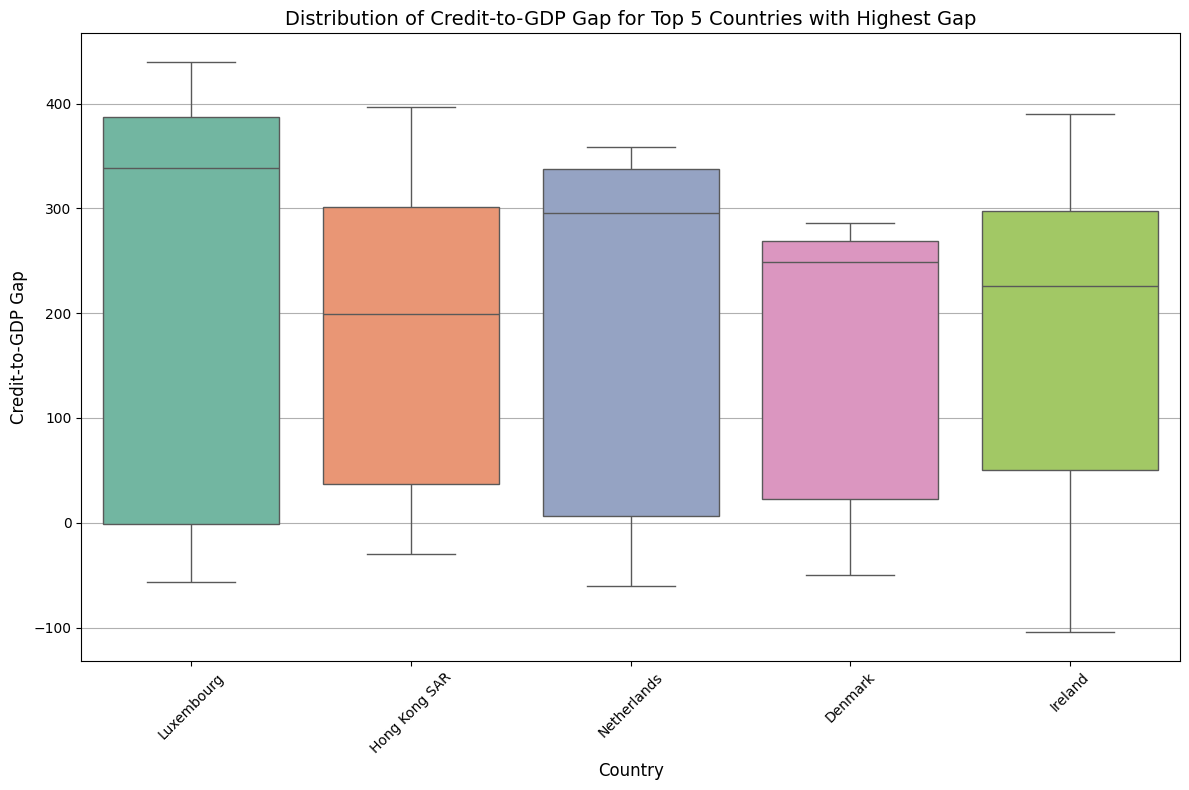

In [23]:
# Ensure Year_Quarter is in datetime format
df_post_2006['Year_Quarter'] = pd.to_datetime(df_post_2006['Year_Quarter'])

# Drop rows with missing Credit_to_GDP_Gap values
df_post_2006 = df_post_2006.dropna(subset=['Credit_to_GDP_Gap'])

# Group by 'Borrowers\' country' and calculate the sum or mean of 'Credit_to_GDP_Gap' for each country
top_5_countries = df_post_2006.groupby("Borrowers' country")['Credit_to_GDP_Gap'].sum().nlargest(5).index

# Filter data for the top 5 countries by Credit-to-GDP Gap
top_countries_data = df_post_2006[df_post_2006["Borrowers' country"].isin(top_5_countries)]

# Create the box plot
plt.figure(figsize=(12, 8))
sns.boxplot(x="Borrowers' country", y="Credit_to_GDP_Gap", data=top_countries_data, palette="Set2")

# Add labels and title
plt.title('Distribution of Credit-to-GDP Gap for Top 5 Countries with Highest Gap', fontsize=14)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Credit-to-GDP Gap', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


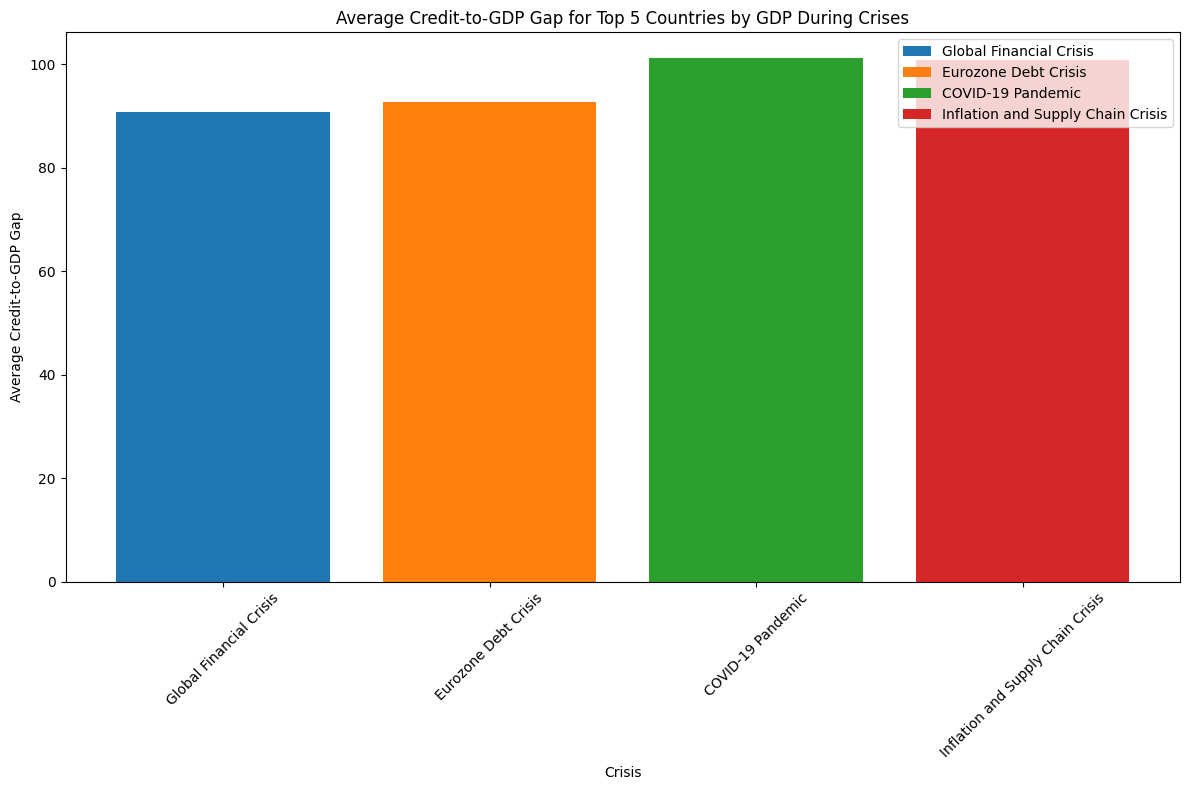

In [66]:
# Define crises periods
crises_periods = {
    "Global Financial Crisis": ('2007-01-01', '2009-12-31'),
    "Eurozone Debt Crisis": ('2010-01-01', '2012-12-31'),
    "COVID-19 Pandemic": ('2020-01-01', '2021-12-31'),
    "Inflation and Supply Chain Crisis": ('2021-01-01', '2024-12-31')
}

# Function to calculate average Credit_to_GDP_Gap for top N countries during a crisis
def average_credit_gap(df, countries, start_date, end_date):
    filtered_data = df[(df['Borrowers\' country'].isin(countries)) &
                        (df['Year_Quarter'] >= start_date) &
                        (df['Year_Quarter'] <= end_date)]
    return filtered_data.groupby('Borrowers\' country')['Credit_to_GDP_Gap'].mean()

# Define top countries by GDP
top_5_countries = ['United States', 'China', 'Japan', 'Germany', 'India']
top_10_countries = ['United States', 'China', 'Japan',
                    'Germany', 'India',
                    'United Kingdom', 'France',
                    'Brazil', 'Italy',
                    'Canada']

# Prepare to collect results
results_top5 = {}
results_top10 = {}

# Calculate averages for each crisis period
for crisis_name, (start_date, end_date) in crises_periods.items():
    results_top5[crisis_name] = average_credit_gap(df_post_2006, top_5_countries, start_date, end_date)
    results_top10[crisis_name] = average_credit_gap(df_post_2006, top_10_countries, start_date, end_date)

# Plotting results for Top 5 Countries
plt.figure(figsize=(12, 8))
for crisis in results_top5:
    plt.bar(crisis, results_top5[crisis].mean(), label=crisis)
plt.title('Average Credit-to-GDP Gap for Top 5 Countries by GDP During Crises')
plt.xlabel('Crisis')
plt.ylabel('Average Credit-to-GDP Gap')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



For the top 5 countries by GDP, the Credit_to_GDP Gap score was higher during COVID-19 followed by Inflation and supply chain crisis,Eurozone Debt Crisis and lastly the Global Financial Crisis.This implies that during COVID, these countries had their credit(debt) level growing faster than the overall economic output(GDP)

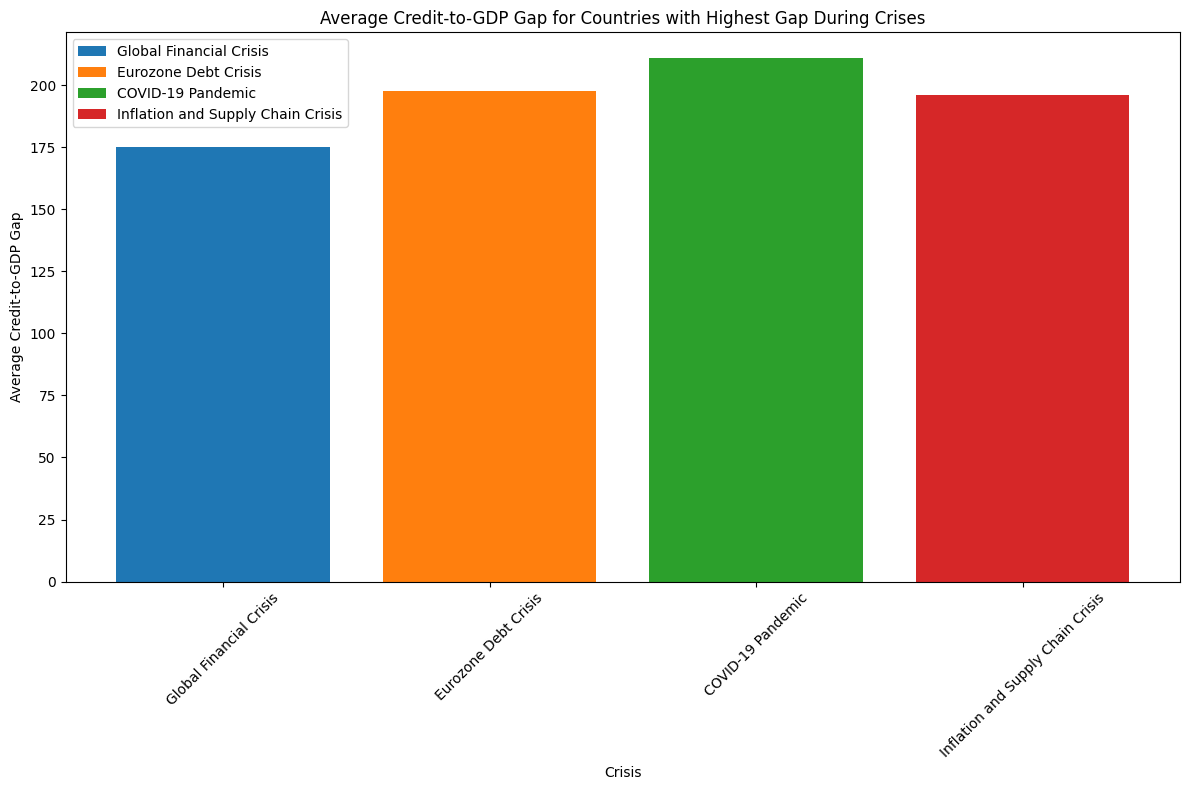

In [26]:
# Define crises periods
crises_periods = {
    "Global Financial Crisis": ('2007-01-01', '2009-12-31'),
    "Eurozone Debt Crisis": ('2010-01-01', '2012-12-31'),
    "COVID-19 Pandemic": ('2020-01-01', '2021-12-31'),
    "Inflation and Supply Chain Crisis": ('2021-01-01', '2024-12-31')
}

# Function to calculate average Credit_to_GDP_Gap for top N countries during a crisis
def average_credit_gap(df, countries, start_date, end_date):
    filtered_data = df[(df['Borrowers\' country'].isin(countries)) &
                        (df['Year_Quarter'] >= start_date) &
                        (df['Year_Quarter'] <= end_date)]
    return filtered_data.groupby('Borrowers\' country')['Credit_to_GDP_Gap'].mean()

# Define the number of top countries by highest Credit-to-GDP Gap
top_n_countries = 5  # You can modify this number if you want more countries

# Find the top N countries with the highest average Credit-to-GDP Gap during the entire period
top_countries_by_gap = df_post_2006.groupby("Borrowers' country")['Credit_to_GDP_Gap'].mean().nlargest(top_n_countries).index

# Prepare to collect results for the top countries
results_top_countries = {}

# Calculate averages for each crisis period for the top countries with the highest Credit-to-GDP Gap
for crisis_name, (start_date, end_date) in crises_periods.items():
    results_top_countries[crisis_name] = average_credit_gap(df_post_2006, top_countries_by_gap, start_date, end_date)

# Plotting results for Top Countries with the Highest Credit-to-GDP Gap
plt.figure(figsize=(12, 8))

# Iterate over the crises and plot the results
for crisis in results_top_countries:
    plt.bar(crisis, results_top_countries[crisis].mean(), label=crisis)

plt.title('Average Credit-to-GDP Gap for Countries with Highest Gap During Crises')
plt.xlabel('Crisis')
plt.ylabel('Average Credit-to-GDP Gap')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


For top 5 countries by Credit_to_GDP_Gap,high levels of Credit_to_GDP_Gap were recorded for for C0VID-19,Erozone Debt Crisis,Inflation and supply chain crisis and lastly the Global Financial Crisis. This implies that during COVID, these countries had their credit(debt) level growing faster than the overall economic output(GDP)

The average value of Credit_to_GDP_Gap is higher in inflation for top 5 countries by GDP. This implies that during COVID, these countries had their credit(debt) level growing faster than the overall economic output(GDP).A high Credit-to-GDP gap suggests that there may be excessive borrowing or lending relative to the size of the economy. This can lead to financial instability because it might indicate that borrowers (businesses or consumers) are taking on more debt than they can handle, which could increase the risk of defaults, particularly if economic growth slows down.

<ipython-input-35-8f67d1b81e82>:33: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




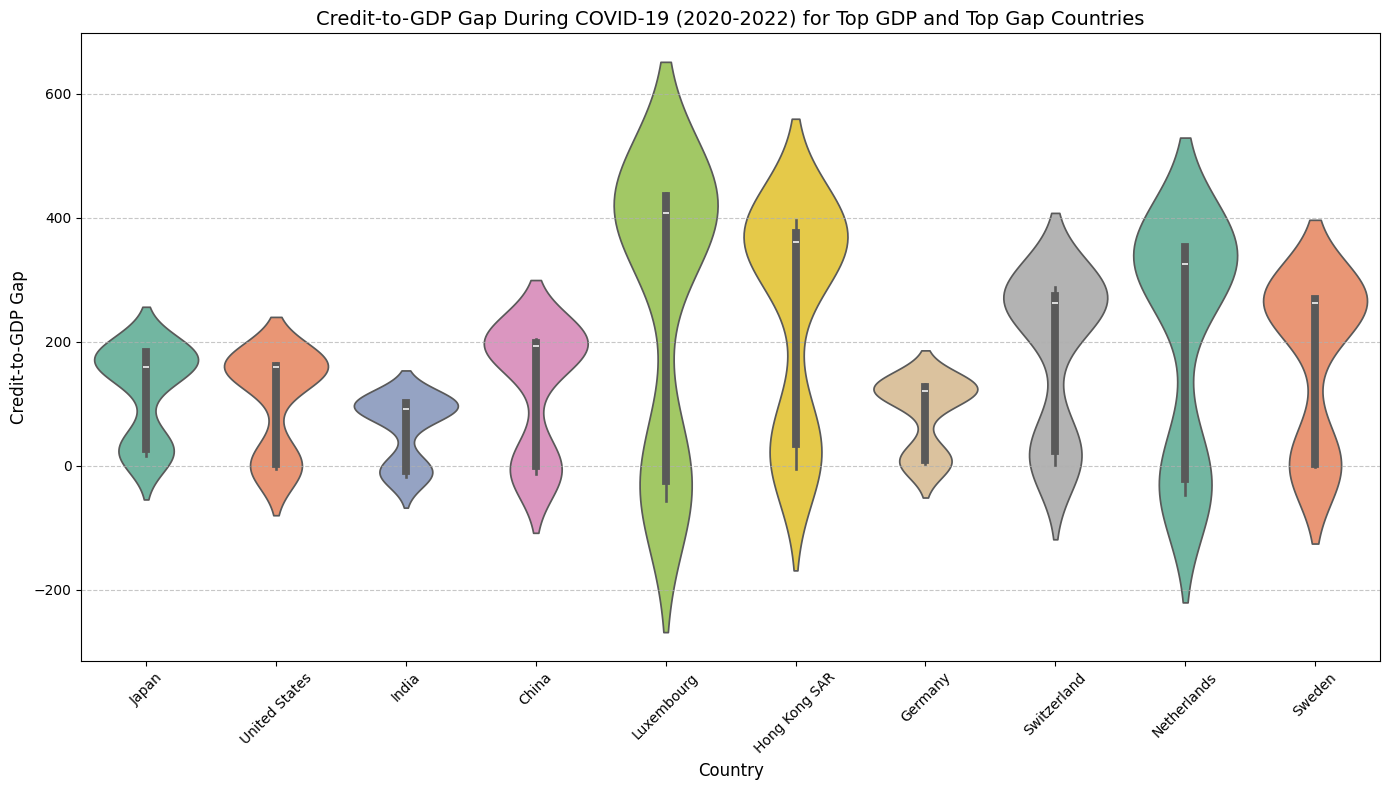

In [35]:
# Filter for the COVID-19 period
covid_period_data = df_post_2006[
    (df_post_2006['Year_Quarter'] >= '2020-01-01') &
    (df_post_2006['Year_Quarter'] <= '2022-12-31')
]

# Define the top 5 countries by GDP
top_5_countries_gdp = ['United States', 'China', 'Japan', 'Germany', 'India']

# Find the top 5 countries with the highest Credit-to-GDP Gap during COVID
top_5_countries_gap = (
    covid_period_data.groupby("Borrowers' country")['Credit_to_GDP_Gap']
    .mean()
    .nlargest(5)
    .index.tolist()
)

# Combine the two sets of countries
combined_countries = list(set(top_5_countries_gdp + top_5_countries_gap))

# Filter data for the combined countries
filtered_data = covid_period_data[covid_period_data["Borrowers' country"].isin(combined_countries)]

# Create the violin plot
plt.figure(figsize=(14, 8))
sns.violinplot(
    x="Borrowers' country",
    y="Credit_to_GDP_Gap",
    data=filtered_data,
    palette="Set2"
)

# Add labels and title
plt.title('Credit-to-GDP Gap During COVID-19 (2020-2022) for Top GDP and Top Gap Countries', fontsize=14)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Credit-to-GDP Gap', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)


Top 5 countries by Credit_to_GDP_Gap borrowed more than the top 5 countries by GDP.Their values are higher than China where COVID-19 originated(except from in Germany)

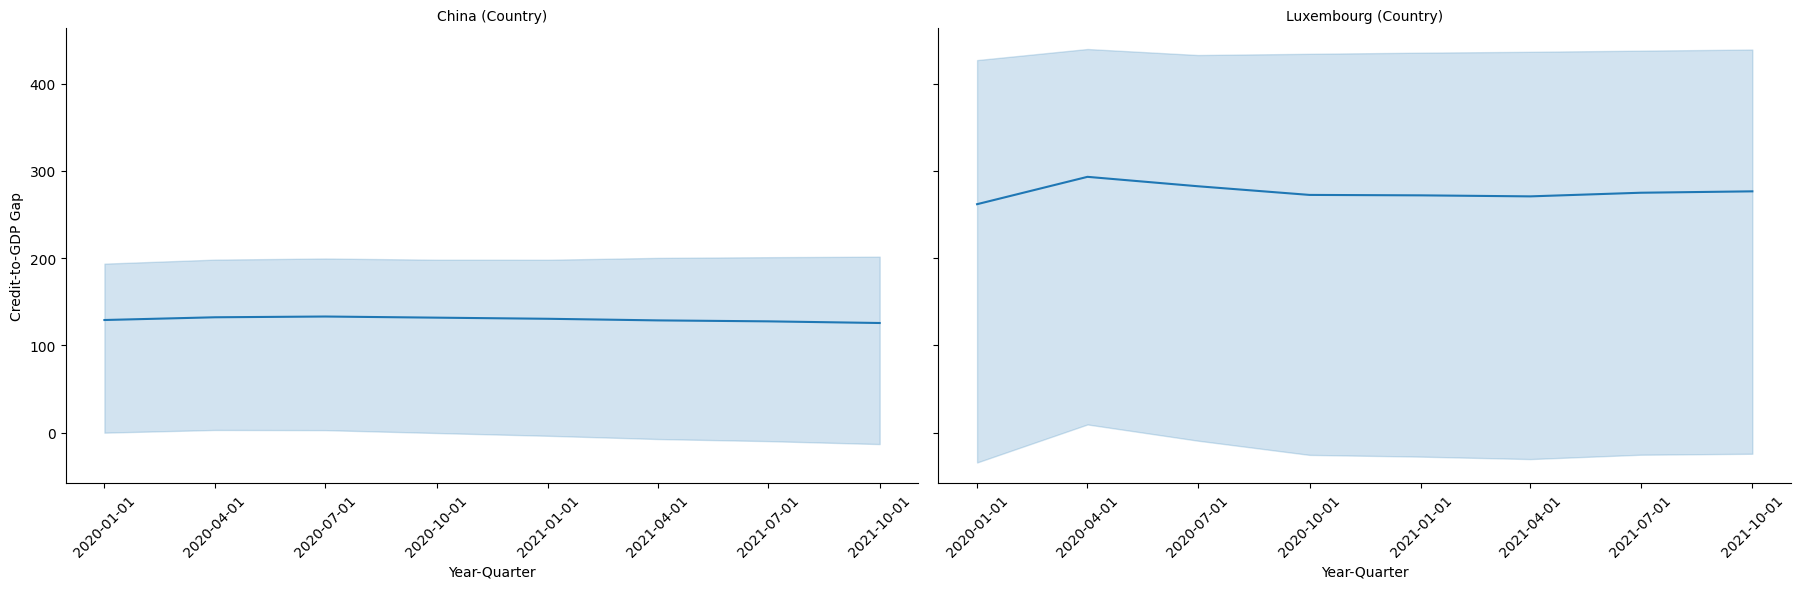

In [44]:
# Filter data for China and Luxembourg during the COVID-19 Pandemic
covid_china_lux = covid_top_countries[covid_top_countries["Borrowers' country"].isin(['China', 'Luxembourg'])]

# Create the FacetGrid for COVID-19 Pandemic
g = sns.FacetGrid(covid_china_lux, col="Borrowers' country", height=6, aspect=1.5)
g.map(sns.lineplot, "Year_Quarter", "Credit_to_GDP_Gap")
g.set_axis_labels("Year-Quarter", "Credit-to-GDP Gap")

# Set titles to indicate which country each plot represents
g.set_titles(col_template="{col_name} (Country)")  # Add "Country" to the titles

# Display the legend
g.add_legend()

# Adjust x-axis labels to make them more readable
g.set_xticklabels(rotation=45)

# Tight layout for better spacing
plt.tight_layout()
plt.show()


# **Economic Recovery Insights**

For China(High GDP), the line in the line graph is a straight horizontal line. This implies that there was stagnation in the countries economy during the pandemic. For Luxembourg, the line in the line graph rises steadly(deterioration of the economy).It then peaks at a point and then has a small decrease( economic recovery). After that, there is a stagnation in the economy.

<ipython-input-36-8d400ade7d54>:26: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




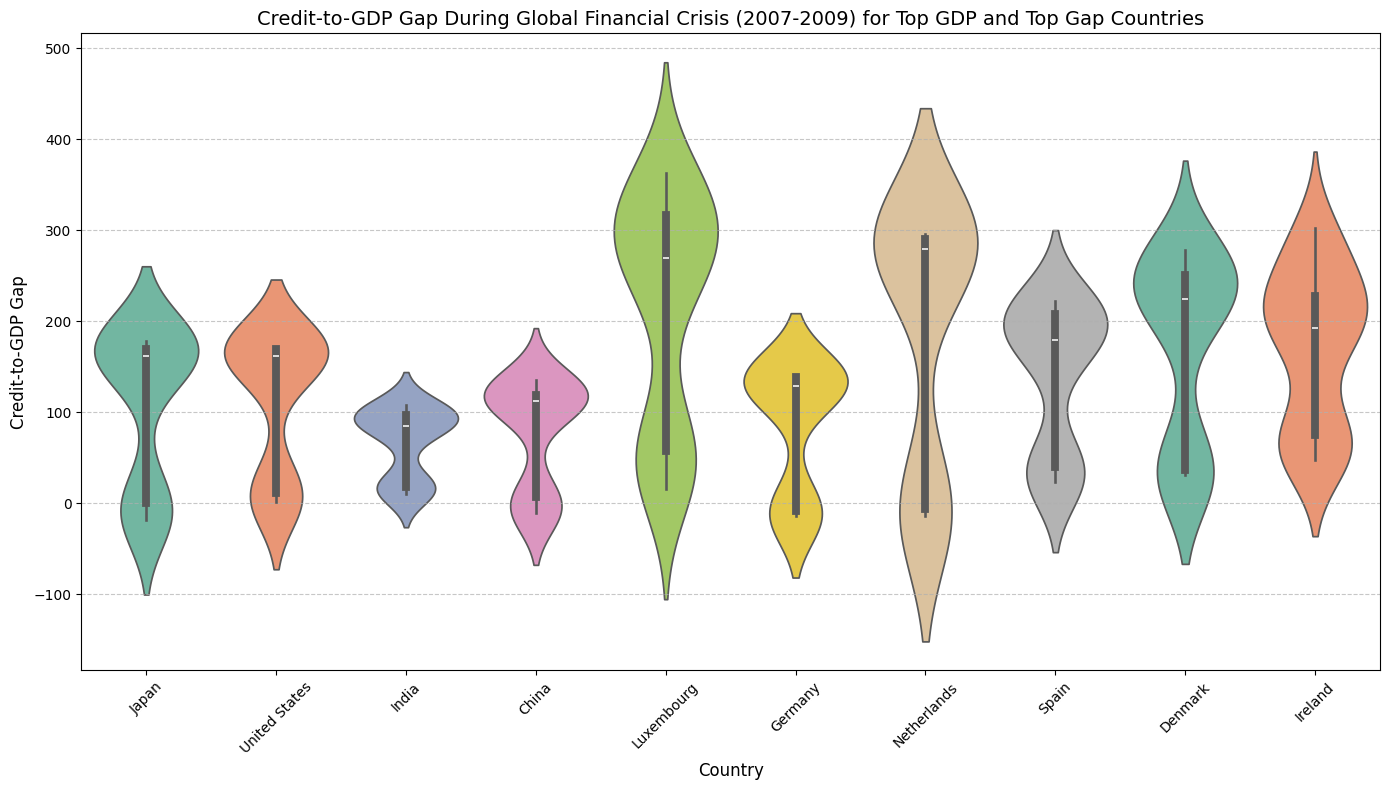

In [36]:
# Filter for the Global Financial Crisis period
gfc_period_data = df_post_2006[
    (df_post_2006['Year_Quarter'] >= '2007-01-01') &
    (df_post_2006['Year_Quarter'] <= '2009-12-31')
]

# Define the top 5 countries by GDP
top_5_countries_gdp = ['United States', 'China', 'Japan', 'Germany', 'India']

# Find the top 5 countries with the highest Credit-to-GDP Gap during the Global Financial Crisis
top_5_countries_gap = (
    gfc_period_data.groupby("Borrowers' country")['Credit_to_GDP_Gap']
    .mean()
    .nlargest(5)
    .index.tolist()
)

# Combine the two sets of countries
combined_countries = list(set(top_5_countries_gdp + top_5_countries_gap))

# Filter data for the combined countries
filtered_data = gfc_period_data[gfc_period_data["Borrowers' country"].isin(combined_countries)]

# Create the violin plot
plt.figure(figsize=(14, 8))
sns.violinplot(
    x="Borrowers' country",
    y="Credit_to_GDP_Gap",
    data=filtered_data,
    palette="Set2"
)

# Add labels and title
plt.title('Credit-to-GDP Gap During Global Financial Crisis (2007-2009) for Top GDP and Top Gap Countries', fontsize=14)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Credit-to-GDP Gap', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()


Top 5 countries by Credit_to_GDP_Gap borrowed more than the top 5 countries by GDP. This means that they are borrowing more. Their values are higher than US which was the heart of the Global Financial Crisis.(Expect from Germany)


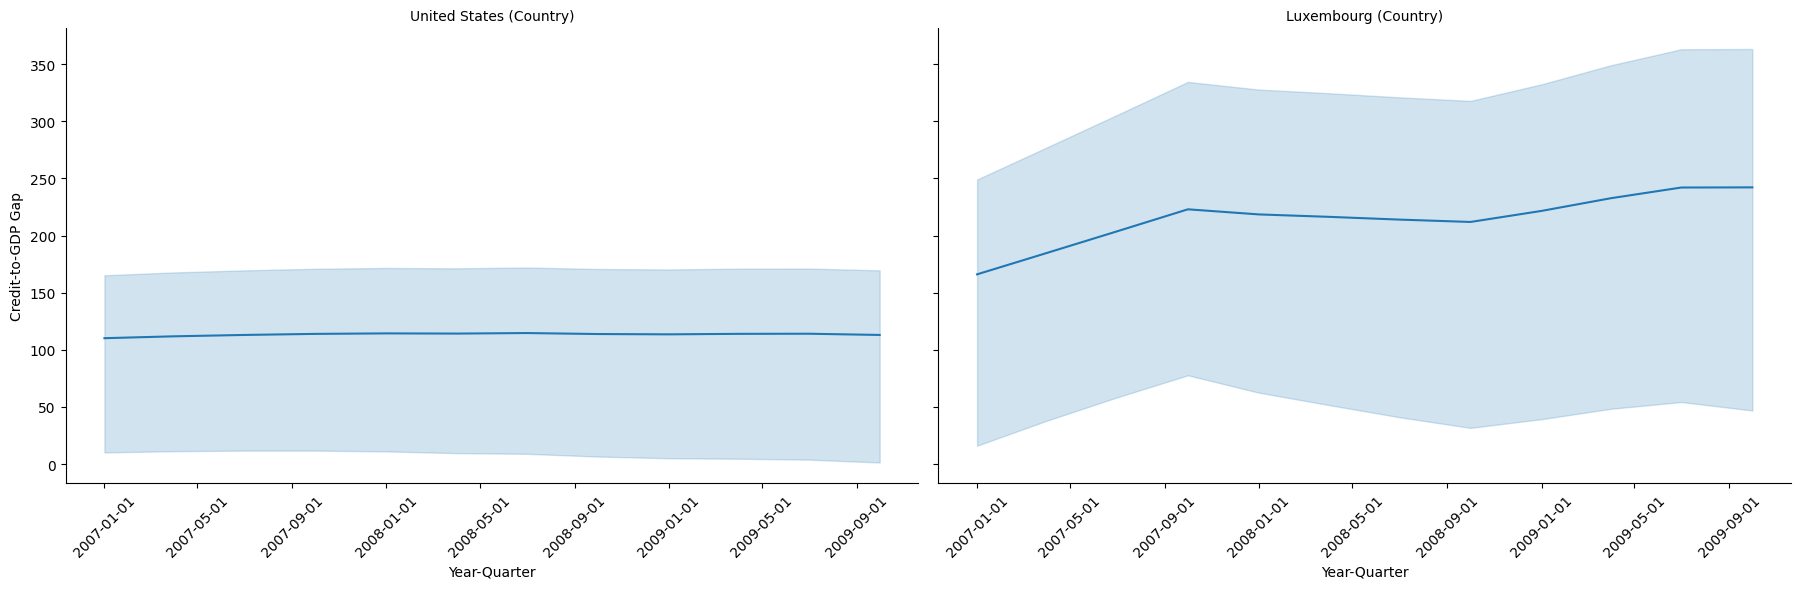

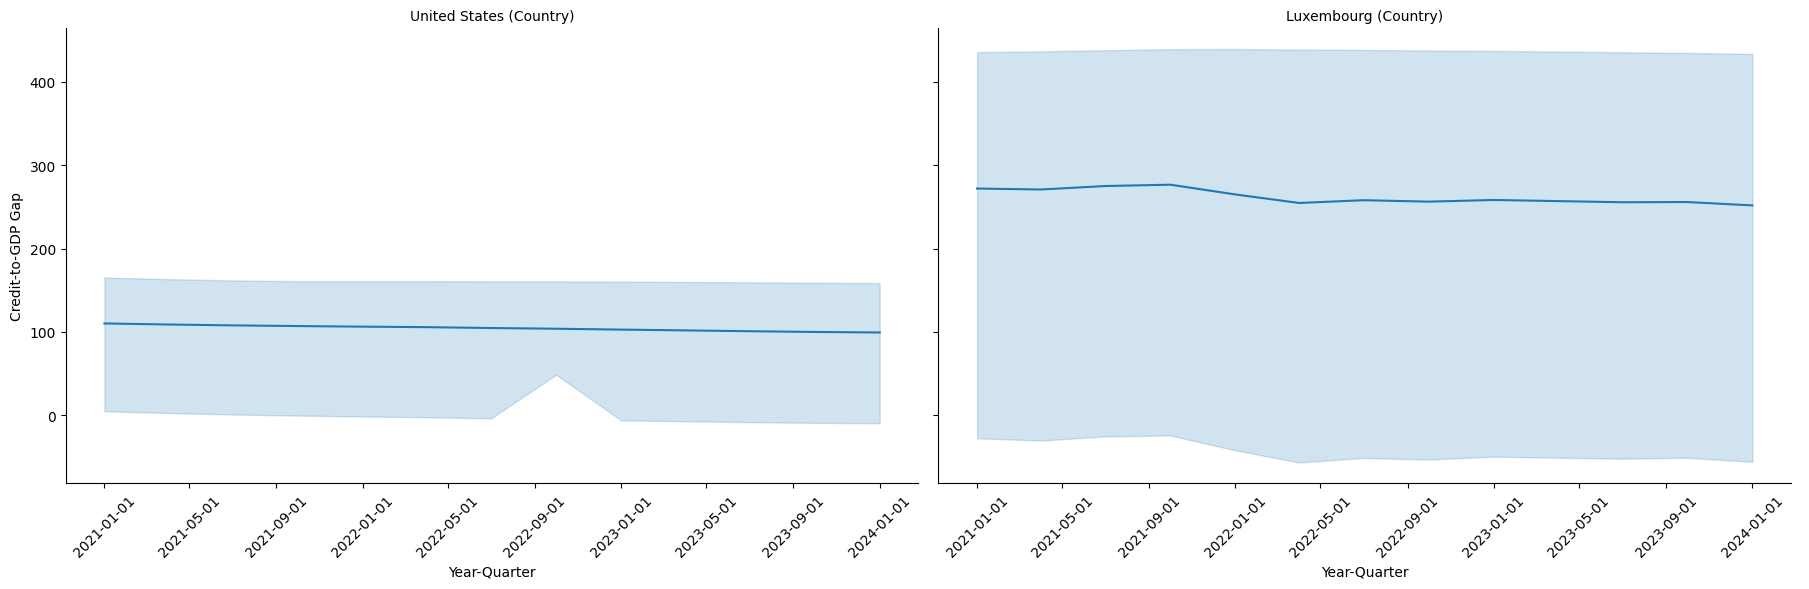

In [69]:
# Define the crisis periods
crises_periods = {
    "Global Financial Crisis": ('2007-01-01', '2009-12-31'),
    "Eurozone Debt Crisis": ('2010-01-01', '2012-12-31'),
    "COVID-19 Pandemic": ('2020-01-01', '2021-12-31'),
    "Inflation and Supply Chain Crisis": ('2021-01-01', '2024-12-31')
}

# Function to filter data for a specific crisis and country
def filter_crisis_data(df, countries, start_date, end_date):
    filtered_data = df[(df['Borrowers\' country'].isin(countries)) &
                       (df['Year_Quarter'] >= start_date) &
                       (df['Year_Quarter'] <= end_date)]
    return filtered_data

# Define countries for comparison during the crises
gfc_countries = ['United States', 'Luxembourg']
isc_countries = ['United States', 'Luxembourg']

# Filter data for the Global Financial Crisis (2007-2009) - US and Luxembourg
gfc_data = filter_crisis_data(df_post_2006, gfc_countries, '2007-01-01', '2009-12-31')

# Create FacetGrid for Global Financial Crisis comparison between US and Luxembourg
g = sns.FacetGrid(gfc_data, col="Borrowers' country", height=6, aspect=1.5)
g.map(sns.lineplot, "Year_Quarter", "Credit_to_GDP_Gap")
g.set_axis_labels("Year-Quarter", "Credit-to-GDP Gap")
g.set_titles(col_template="{col_name} (Country)")
g.add_legend()
g.set_xticklabels(rotation=45)
plt.tight_layout()
plt.show()

# Filter data for Inflation and Supply Chain Crisis (2021-2024) - US and Luxembourg
isc_data = filter_crisis_data(df_post_2006, isc_countries, '2021-01-01', '2024-12-31')

# Create FacetGrid for Inflation and Supply Chain Crisis comparison between US and Luxembourg
g = sns.FacetGrid(isc_data, col="Borrowers' country", height=6, aspect=1.5)
g.map(sns.lineplot, "Year_Quarter", "Credit_to_GDP_Gap")
g.set_axis_labels("Year-Quarter", "Credit-to-GDP Gap")
g.set_titles(col_template="{col_name} (Country)")
g.add_legend()
g.set_xticklabels(rotation=45)
plt.tight_layout()
plt.show()


# **Economic Recovery Insights**

For USA(High GDP), the line in the line graph is a straight horizontal line. This implies that there was stagnation in the countries economy during the crisis. For Luxembourg, the line in the line graph rises steadly(deterioration of the economy).It then peaks at a point and then the line become horizontal(economic stagnation). It then rises over time(economic deterioration)

<ipython-input-37-a94b875967f8>:26: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




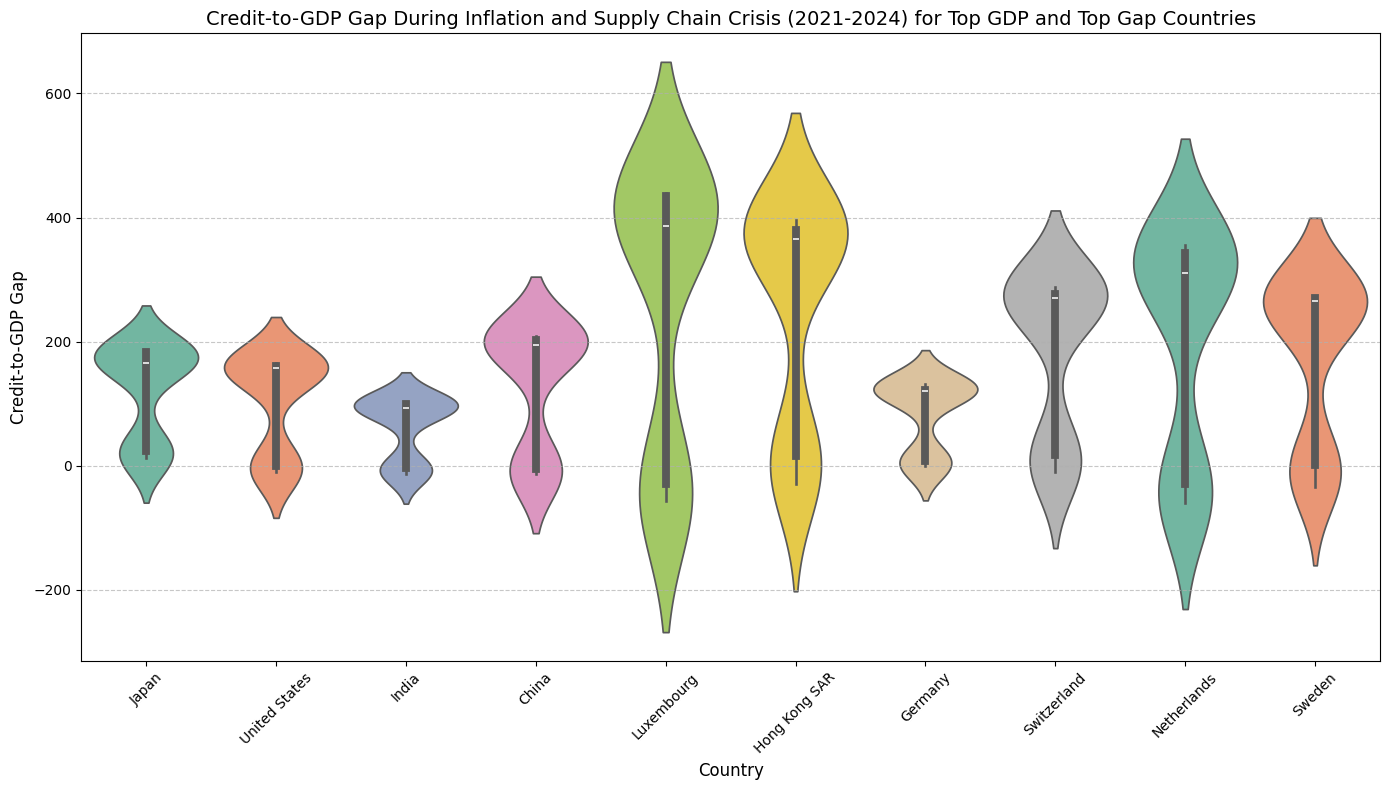

In [37]:
# Filter for the Inflation and Supply Chain Crisis period
isc_period_data = df_post_2006[
    (df_post_2006['Year_Quarter'] >= '2021-01-01') &
    (df_post_2006['Year_Quarter'] <= '2024-12-31')
]

# Define the top 5 countries by GDP
top_5_countries_gdp = ['United States', 'China', 'Japan', 'Germany', 'India']

# Find the top 5 countries with the highest Credit-to-GDP Gap during the Inflation and Supply Chain Crisis
top_5_countries_gap = (
    isc_period_data.groupby("Borrowers' country")['Credit_to_GDP_Gap']
    .mean()
    .nlargest(5)
    .index.tolist()
)

# Combine the two sets of countries
combined_countries = list(set(top_5_countries_gdp + top_5_countries_gap))

# Filter data for the combined countries
filtered_data = isc_period_data[isc_period_data["Borrowers' country"].isin(combined_countries)]

# Create the violin plot
plt.figure(figsize=(14, 8))
sns.violinplot(
    x="Borrowers' country",
    y="Credit_to_GDP_Gap",
    data=filtered_data,
    palette="Set2"
)

# Add labels and title
plt.title('Credit-to-GDP Gap During Inflation and Supply Chain Crisis (2021-2024) for Top GDP and Top Gap Countries', fontsize=14)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Credit-to-GDP Gap', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()


Top 5 countries by Credit_to_GDP_Gap borrowed more than the top 5 countries by GDP. Germany is an exception.

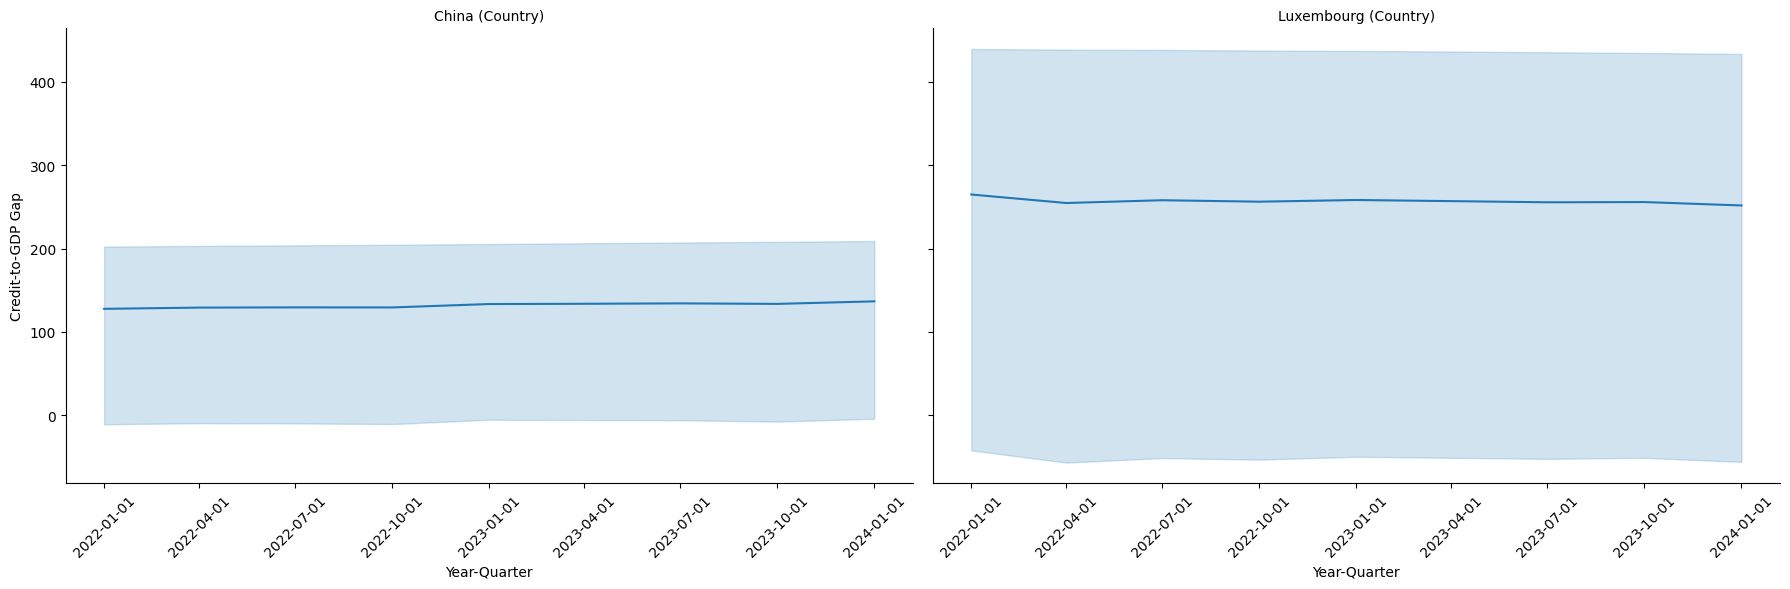

In [70]:
# Filter data for the Inflation and Supply Chain Crisis (2022-2024) - China and Luxembourg
inflation_supply_chain_data = df_post_2006[(df_post_2006["Borrowers' country"].isin(['China', 'Luxembourg'])) &
                                           (df_post_2006['Year_Quarter'] >= '2022-01-01') &
                                           (df_post_2006['Year_Quarter'] <= '2024-12-31')]

# Create the FacetGrid for Inflation and Supply Chain Crisis
g = sns.FacetGrid(inflation_supply_chain_data, col="Borrowers' country", height=6, aspect=1.5)
g.map(sns.lineplot, "Year_Quarter", "Credit_to_GDP_Gap")
g.set_axis_labels("Year-Quarter", "Credit-to-GDP Gap")

# Set titles to indicate which country each plot represents
g.set_titles(col_template="{col_name} (Country)")

# Adjust x-axis labels to make them more readable
g.set_xticklabels(rotation=45)

# Tight layout for better spacing
plt.tight_layout()
plt.show()


# **Economic Recovery Insights**

For China(High GDP), the line in the line graph is a straight horizontal line. This implies that there was stagnation in the countries economy during the crisis. For Luxembourg, the line in the line graph drops and then becomes a straight horizontal line. This implies that the economy improved for some time and then stagnated. At some point the line drops steadily again signifying an improvement in the economy.